### Introduction
This script finds the optimal band gaps of mechanical stack III-V-Si solar cells. I uses a detailed balance approach to calculate the I-V of individual subcells. For calculating efficiency, I add up the maximum power of individual subcell and divide it by the total illumination power.
Details of how the I-V is calculated can be referred to [this paper](http://arxiv.org/abs/1512.02056).

In [8]:
%matplotlib inline
import numpy as np
from scipy.interpolate import interp2d
import matplotlib.pyplot as plt
from scipy.io import savemat
from iii_v_si import calc_2j_si_eta, calc_2j_si_eta_direct
from detail_balanced_MJ import calc_1j_eta

In [9]:
def vary_top_eg(top_cell_qe,n_s=1):
    topcell_eg = np.linspace(0.9, 3, num=100)
    eta = np.zeros(topcell_eg.shape)

    for p in range(topcell_eg.shape[0]):
        eta[p] = calc_2j_si_eta_direct(top_eg=topcell_eg[p], top_rad_eta=1, 
                                       top_qe=top_cell_qe, bot_rad_eta=1,
                                       bot_qe=1, n_s=n_s, mj="MS")


    print("At AM1.5g, direct band gap assumption of silicon")
    print("max eta %s:" % eta.max())
    print("optimal Eg: %s" % topcell_eg[eta.argmax()])
    
    return topcell_eg,eta

### Assume that the top cell has 100% EQE

In [10]:
eg1,eta1=vary_top_eg(1)

At AM1.5g, direct band gap assumption of silicon
max eta 0.420201808415:
optimal Eg: 1.81212121212


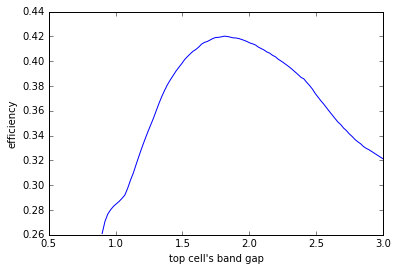

In [11]:
plt.plot(eg1,eta1)
plt.xlabel("top cell's band gap")
plt.ylabel("efficiency")

The maximum efficiency is then **42%**, and the optimal band gap is **1.81 eV**. For two-terminal, 2J devices, maximum efficiency is **41%** with a **1.74-eV** top cell on silicon. As we can see, using mechanical stack did not benefit the efficiency fundamentally.

### Try if different EQE values shift the peak

At AM1.5g, direct band gap assumption of silicon
max eta 0.35913873364:
optimal Eg: 1.81212121212
At AM1.5g, direct band gap assumption of silicon
max eta 0.389610469279:
optimal Eg: 1.81212121212
At AM1.5g, direct band gap assumption of silicon
max eta 0.420201808415:
optimal Eg: 1.81212121212


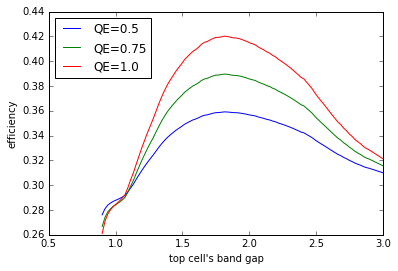

In [12]:
qe_range=np.linspace(0.5,1,num=3)
for q in qe_range:
    eg,eta = vary_top_eg(q)
    plt.plot(eg,eta,hold=True,label="QE=%s"%q)
    plt.legend(loc="best")
    plt.xlabel("top cell's band gap")
    plt.ylabel("efficiency")

Different top cell's EQEs do not change the optimal band gap of the top cell, as expected.

### Assume that the top cell has very low EQE

At AM1.5g, direct band gap assumption of silicon
max eta 0.299395577325:
optimal Eg: 0.9


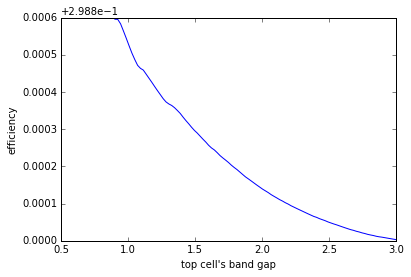

In [13]:
eg1,eta1=vary_top_eg(0.001)
plt.plot(eg1,eta1)
plt.xlabel("top cell's band gap")
plt.ylabel("efficiency")

The maximum efficiency in this case is around 30%. Which should be very close the limiting efficiency of 1J GaAs. We can check:

In [14]:
# calulate the SQ-limit efficiency of silicon
eta = calc_1j_eta(eg=1.12, qe=1, r_eta=1, cell_temperature=300)
print(eta)

0.305471207632


The SQ-limit efficiency is 30%, which is close to the efficiency of the 2J mechanical stack cell with nearly tranparent top cell.